In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv("bismillah.csv")
X = df.drop(columns=['harga'])
y = df['harga']

## Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Preparation (One-Hot Encoder dan Standard Scaler)

In [4]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

In [5]:
preprocessor = ColumnTransformer(
   transformers=[
       ('cat', OneHotEncoder(), categorical_features),
       ('num', StandardScaler(), numerical_features),
   ]
)

## Model Development

In [6]:
pipeline = Pipeline([
       ('preprocessor', preprocessor),
       ('regressor', GradientBoostingRegressor(n_estimators=1000,
                                              min_samples_split=5,
                                              min_samples_leaf=5,
                                              max_depth=8)),
])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['kecamatan', 'kota']),
                                                 ('num', StandardScaler(),
                                                  ['kamar_tidur', 'kamar_mandi',
                                                   'luas'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=8, min_samples_leaf=5,
                                           min_samples_split=5,
                                           n_estimators=1000))])

In [8]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"MSE: {mse} and RMSE:{rmse}")

MSE: 1.9121784983833802e+17 and RMSE:437284632.5202133


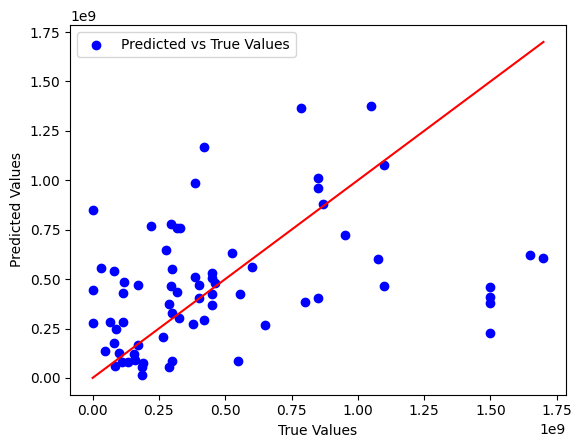

In [11]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.show()


In [10]:
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['kecamatan', 'kota']),
                                   ('num', StandardScaler(),
                                    ['kamar_tidur', 'kamar_mandi', 'luas'])])),
  ('regressor',
   GradientBoostingRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                             n_estimators=1000))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['kecamatan', 'kota']),
                                 ('num', StandardScaler(),
                                  ['kamar_tidur', 'kamar_mandi', 'luas'])]),
 'regressor': GradientBoostingRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                           n_estimators=1000),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'drop',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('c